# Analysing NSW Property Data



In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt


#### Combine the data

In [3]:
files = [file for file in os.listdir("./LGA_data") if file.endswith(".xls")]
all_files = pd.DataFrame()

for file in files:
    df = pd.read_excel("./LGA_data/" + file)
    all_files = pd.concat([all_files, df])

#### Clean the data

In [4]:
all_files.dropna(subset=['Street Display'], inplace=True)

In [5]:
df = all_files
df.to_csv('alldata.csv', index=False)

#### Analyse the data

In [6]:
# Check if all LGAs have sale data from 1/7/2018 to 1/7/2023
# oldest_sale_dates = df.groupby('LGA')['Sale Date'].min()
# print(oldest_sale_dates)
# oldest_sale_dates.to_csv('oldest_sale_dates.csv')

When downloading the data, I noticed that there would be a maximum of 10,000 observations downloaded for each LGA. I want to investigate whether there is a gap of sales data in those LGAs from 01/07/2018 to 01/07/2023. I will need to download more data for these LGAs. Below I find at what date I should re-download data.

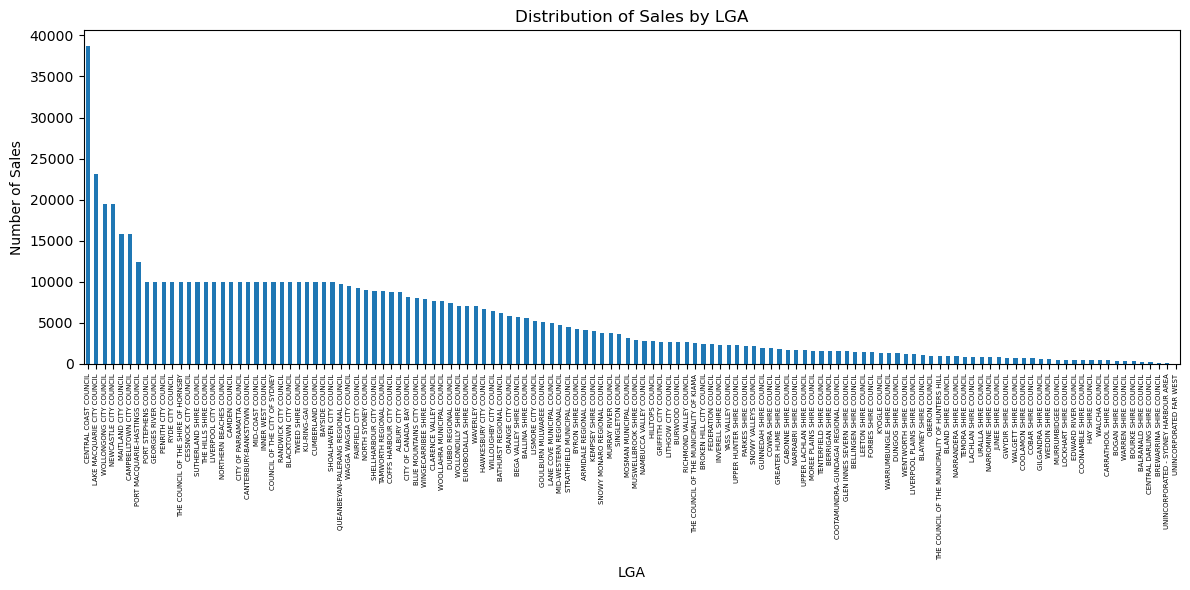

LGAs with 10,000 sales, latest sale dates, and Street Display:
LGA: PORT STEPHENS COUNCIL, Latest Sale Date: 2023-04-24 00:00:00, Street Display: 12 IONA LANE
LGA: GEORGES RIVER COUNCIL, Latest Sale Date: 2022-07-25 00:00:00, Street Display: 12/22 BELGRAVE ST
LGA: PENRITH CITY COUNCIL, Latest Sale Date: 2021-03-19 00:00:00, Street Display: 6 WATERFALL CRES
LGA: RYDE CITY COUNCIL, Latest Sale Date: 2022-03-04 00:00:00, Street Display: 2A FAY PL
LGA: THE COUNCIL OF THE SHIRE OF HORNSBY, Latest Sale Date: 2022-10-24 00:00:00, Street Display: 37 CROSSLANDS RD
LGA: CESSNOCK CITY COUNCIL, Latest Sale Date: 2023-01-18 00:00:00, Street Display: 44 BLACKWOOD AVE
LGA: SUTHERLAND SHIRE COUNCIL, Latest Sale Date: 2020-11-07 00:00:00, Street Display: 101B WORONORA CRES
LGA: THE HILLS SHIRE COUNCIL, Latest Sale Date: 2020-11-10 00:00:00, Street Display: 1 BARAKEE CRES
LGA: LIVERPOOL CITY COUNCIL, Latest Sale Date: 2021-03-10 00:00:00, Street Display: 8 EL ALAMEIN AVE
LGA: NORTHERN BEACHES COUNCIL, L

In [7]:
# Group the data by LGA and count the number of sales
sales_count_by_lga = df['LGA'].value_counts()

# Plot the distribution graph
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sales_count_by_lga.plot(kind='bar')
plt.xlabel('LGA')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales by LGA')
plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the layout
plt.show()

# Filter LGAs with 10,000 sales
lgas_with_10000_sales = sales_count_by_lga[sales_count_by_lga == 10000]

# Print the names of LGAs with 10,000 sales
print("LGAs with 10,000 sales, latest sale dates, and Street Display:")
for lga in lgas_with_10000_sales.index:
    lga_data = df[df['LGA'] == lga]
    latest_sale_date = lga_data['Sale Date'].max()
    latest_sale_street_display = lga_data.loc[lga_data['Sale Date'] == latest_sale_date, 'Street Display'].iloc[0]
    print(f"LGA: {lga}, Latest Sale Date: {latest_sale_date}, Street Display: {latest_sale_street_display}")

In [24]:
lga_specific_sales = df[df['LGA'] == 'CAMDEN COUNCIL']
lga_specific_sales.head(30)


,Disclaimer,Building Name,Street Display,Alternate Street Display,Other,Unit,Number,Street Name,Locality,Postcode,...,Valuation Date,Valuation Amount,LGA,Dealing Number,Government Number,Parent Government Number,PDS ID,Sale ID,Load Date,Property ID
0,NaN,NaN,11 GRAZIER AVE,NaN,NaN,NaN,11,GRAZIER AVE,GREGORY HILLS,2557.0,...,2022-07-01 00:00:00,3010000.0,CAMDEN COUNCIL,AR284430,NSW4372924,NaN,1.512945e+09,74672024.0,2021-08-02 08:43:49.286,NaN
1,NaN,NaN,19 GARNSEY WAY,NaN,NaN,NaN,19,GARNSEY WAY,ORAN PARK,2570.0,...,2022-07-01 00:00:00,366000.0,CAMDEN COUNCIL,AQ869340,NSW4263057,NaN,1.507344e+09,73546978.0,2021-03-22 09:05:46.150,NaN
2,NaN,NaN,9 STANHAM CCT,NaN,NaN,NaN,9,STANHAM CCT,GLEDSWOOD HILLS,2557.0,...,2022-07-01 00:00:00,1140000.0,CAMDEN COUNCIL,AQ879189,NSW4328510,NaN,1.511954e+09,73546981.0,2021-03-22 09:05:46.151,NaN
3,NaN,NaN,20 GLORY LOOP,NaN,NaN,NaN,20,GLORY LOOP,CATHERINE FIELD,2557.0,...,2022-07-01 00:00:00,525000.0,CAMDEN COUNCIL,AQ858267,NSW4312140,NaN,1.511604e+09,73503340.0,2021-03-15 11:06:26.640,NaN
4,NaN,NaN,49 REVELL ST,NaN,NaN,NaN,49,REVELL ST,ORAN PARK,2570.0,...,2022-07-01 00:00:00,396000.0,CAMDEN COUNCIL,AQ850519,NSW4320928,NaN,1.511874e+09,73503336.0,2021-03-15 11:06:26.639,NaN
5,NaN,NaN,15 O`KEEFE DR,NaN,NaN,NaN,15,O'KEEFE DR,ORAN PARK,2570.0,...,2022-07-01 00:00:00,527000.0,CAMDEN COUNCIL,AQ889670,NSW3940984,NaN,1.499235e+09,73614767.0,2021-03-30 15:16:31.926,NaN
6,NaN,NaN,40 ANNANVALE CRCT,NaN,NaN,NaN,40,ANNANVALE CCT CRCT,MOUNT ANNAN,2567.0,...,2022-07-01 00:00:00,310000.0,CAMDEN COUNCIL,AS780072,NSW4461756,NaN,1.518393e+09,80796534.0,2023-01-16 10:45:14.247,NaN
7,NaN,NaN,24 LILLYDALE AVE,NaN,NaN,NaN,24,LILLYDALE AVE,GLEDSWOOD HILLS,2557.0,...,2022-07-01 00:00:00,655000.0,CAMDEN COUNCIL,AQ761008,NSW3621805,NaN,1.987331e+07,73286587.0,2021-02-15 09:28:49.976,NaN
8,NaN,NaN,15 FENNER TCE,NaN,NaN,NaN,15,FENNER TCE,ORAN PARK,2570.0,...,2022-07-01 00:00:00,445000.0,CAMDEN COUNCIL,AR245996,NSW4342758,NaN,1.512437e+09,74568963.0,2021-07-19 08:46:50.866,NaN
9,NaN,NaN,5 BATTERSBY AVE,NaN,NaN,NaN,5,BATTERSBY AVE,ORAN PARK,2570.0,...,2022-07-01 00:00:00,420000.0,CAMDEN COUNCIL,AQ838042,NSW4342133,NaN,1.512322e+09,73456874.0,2021-03-08 08:56:34.219,NaN
